In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr
import seaborn as sns
from math import ceil
from sklearn.decomposition import PCA

In [2]:
size = 256
n_im = 45
images = np.empty((n_im, size, size))
for i in range(n_im):
    images[i] = np.log(np.genfromtxt('ruderman/image_{}.txt'.format(1+i))) #already log-transformed
    images[i] = images[i] - np.mean(images[i])

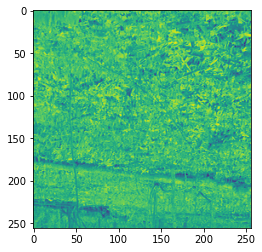

In [3]:
plt.imshow(images[10])

In [4]:
# image = images[0]

### Extract patches

In [5]:
def sample_patches(n_points, d, an_image, seed = 10):
    np.random.seed(seed)
    xs = np.random.choice(np.arange(d,size), n_points, replace = True)
    ys = np.random.choice(np.arange(d,size), n_points, replace = True)
    patches = np.empty((n_points, d*d))
    for p in range(n_points):
        patches[p] = square(xs[p], ys[p], d, an_image)
    return patches

In [6]:
def square(cx, cy, d, an_image):
    mask = np.zeros_like(an_image)
    mask[cx-d:cx, cy-d:cy] = 1
    return an_image[np.where(mask == True)]

In [7]:
n_points = 500
fpatches = []
d = 7
for i in range(n_im):
    image = images[0]
    fpatches.append(sample_patches(n_points, d, image))
fpatches = np.reshape(np.array(fpatches), (n_im*n_points, d*d))

In [8]:
fpatches.shape

(22500, 49)

### Do PCA on patches

In [9]:
pca = PCA(n_components=d*d, copy = True, random_state = 45)
PCpatches = pca.fit(fpatches)
eigenvectors = PCpatches.components_ #(n_components, n_features) = (49,49)
eigenvalues = pca.singular_values_ #(n_components,)

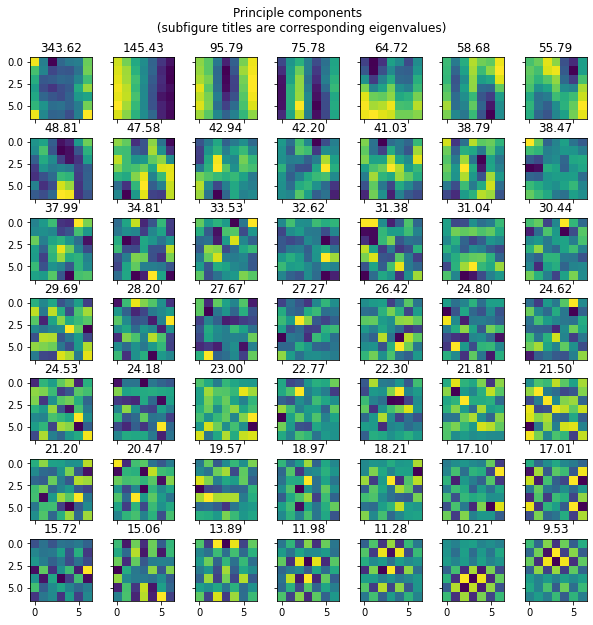

In [10]:
fig, ax = plt.subplots(d, d, figsize = (10,10), sharex = True, sharey = True)
plt.suptitle('Principle components \n (subfigure titles are corresponding eigenvalues)', y = 0.95)
for i in range(d*d):
    ax[i//d][i%d].imshow(np.reshape(eigenvectors[i], (d,d)))
    ax[i//d][i%d].set_title('{:.2f}'.format(eigenvalues[i]))
fig.subplots_adjust(wspace = 0.3, hspace = 0.3)